## Importation

In [ ]:
# Import des librairies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [ ]:
# Importation des fichiers

df_customers = pd.read_csv("customers.csv", sep=';')
df_products = pd.read_csv("products.csv", sep=";")
df_transactions = pd.read_csv("transactions.csv", sep=";", dtype=str)

In [ ]:
# Vérification de l'importation

df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [ ]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [ ]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [ ]:
#Renommer les variables pour une meilleure compréhension

df_customers.rename(columns={
    'sex': 'genre',
    'birth': 'annee_naissance'
}, inplace=True)

df_products.rename(columns={
    'categ': 'categorie',
    'id_prod': 'id_produit',
    'price':'prix'
}, inplace=True)

df_transactions.rename(columns={
    'id_prod': 'id_produit',
    'date': 'date_transaction'
}, inplace=True)


## Analyses exploratoires

In [ ]:
# Analyse exploratoire df_customers

# Aperçu des premières lignes
df_customers.head()

# Dimensions du DataFrame
print("Taille du DataFrame :", df_customers.shape)

# Types de données
print("\nTypes de données :")
print(df_customers.dtypes)

# Valeurs manquantes
print("\nValeurs manquantes :")
print(df_customers.isnull().sum())

# Doublons
print("\nDoublons :")
print(df_customers.duplicated().sum())


Taille du DataFrame : (8621, 3)

Types de données :
client_id          object
genre              object
annee_naissance     int64
dtype: object

Valeurs manquantes :
client_id          0
genre              0
annee_naissance    0
dtype: int64

Doublons :
0


In [ ]:
# Analyse exploratoire df_products

# Taille
print("Taille de df_products :", df_products.shape)

# Types de données
print("\nTypes de données :")
print(df_products.dtypes)

# Valeurs manquantes
print("\nValeurs manquantes :")
print(df_products.isna().sum())

# Doublons
print("\nDoublons :")
print(df_products.duplicated().sum())


Taille de df_products : (3286, 3)

Types de données :
id_produit     object
prix          float64
categorie       int64
dtype: object

Valeurs manquantes :
id_produit    0
prix          0
categorie     0
dtype: int64

Doublons :
0


In [ ]:
# Analyse exploratoire df_transactions

# Taille
print("Taille de df_transactions :", df_transactions.shape)

# Types de données
print("\nTypes de données :")
print(df_transactions.dtypes)

# Valeurs manquantes
print("\nValeurs manquantes :")
print(df_transactions.isna().sum())

# Doublons
print("\nDoublons :")
print(df_transactions.duplicated().sum())


Taille de df_transactions : (687534, 4)

Types de données :
id_produit          object
date_transaction    object
session_id          object
client_id           object
dtype: object

Valeurs manquantes :
id_produit          0
date_transaction    0
session_id          0
client_id           0
dtype: int64

Doublons :
0


In [ ]:
# Changement de type de la colonne date_transaction en date

df_transactions["date_transaction"] = pd.to_datetime(
    df_transactions["date_transaction"], errors="coerce"
)

print(df_transactions["date_transaction"].dtypes)


datetime64[ns]


In [ ]:
df_transactions.head()

,id_produit,date_transaction,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


## Jointure des fichiers

In [ ]:
# Jointure gauche df_transactions et df_customers

df_merge = pd.merge(df_transactions, df_customers, on="client_id", how="left")

df_merge.head()


,id_produit,date_transaction,session_id,client_id,genre,annee_naissance
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956


In [ ]:
# Vérification de l'intégrité de la jointure

# Nombre total de lignes dans df_transactions
nb_lignes_transactions = df_transactions.shape[0]

# Nombre de lignes dans df_merge (devrait être identique)
nb_lignes_merge = df_merge.shape[0]

# Vérifier s’il manque des informations client (exemple : genre, année de naissance)
nb_genre_manquants = df_merge["genre"].isna().sum()
nb_naissance_manquants = df_merge["annee_naissance"].isna().sum()

print(f"Nombre de lignes dans df_transactions : {nb_lignes_transactions}")
print(f"Nombre de lignes après la jointure (df_merge) : {nb_lignes_merge}")
print(f"Nombre de genres manquants : {nb_genre_manquants}")
print(f"Nombre d'années de naissance manquantes : {nb_naissance_manquants}")


Nombre de lignes dans df_transactions : 687534
Nombre de lignes après la jointure (df_merge) : 687534
Nombre de genres manquants : 0
Nombre d'années de naissance manquantes : 0


In [ ]:
# Jointure gauche df_merge df_products
df_final = pd.merge(df_merge, df_products, on="id_produit", how="left")

df_final.head()


,id_produit,date_transaction,session_id,client_id,genre,annee_naissance,prix,categorie
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,19.37,0
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,4.50,0
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,6.55,0
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,16.49,0


In [ ]:
# Vérification de l'intégrité de la jointure

# Nombre total de lignes dans df_merge (table de gauche)
nb_lignes_merge = df_merge.shape[0]

# Nombre de lignes après la jointure avec df_products
nb_lignes_final = df_final.shape[0]

# Vérifier s’il manque des informations produits (exemple : catégorie)
nb_categorie_manquants = df_final["categorie"].isna().sum()
nb_prix_manquants = df_final["prix"].isna().sum()

print(f"Nombre de lignes dans df_merge : {nb_lignes_merge}")
print(f"Nombre de lignes après la jointure (df_final) : {nb_lignes_final}")
print(f"Nombre de catégories manquantes : {nb_categorie_manquants}")
print(f"Nombre de prix manquants : {nb_prix_manquants}")


Nombre de lignes dans df_merge : 687534
Nombre de lignes après la jointure (df_final) : 687534
Nombre de catégories manquantes : 0
Nombre de prix manquants : 0


In [ ]:
# Réorganisation des colonnes

df_final = df_final[
    ['session_id', 'date_transaction', 'id_produit','categorie',
     'prix', 'client_id', 'genre', 'annee_naissance',]
]

df_final.head()

,session_id,date_transaction,id_produit,categorie,prix,client_id,genre,annee_naissance
0,s_1,2021-03-01 00:01:07.843138,0_1259,0,11.99,c_329,f,1967
1,s_2,2021-03-01 00:02:26.047414,0_1390,0,19.37,c_664,m,1960
2,s_3,2021-03-01 00:02:38.311413,0_1352,0,4.50,c_580,m,1988
3,s_4,2021-03-01 00:04:54.559692,0_1458,0,6.55,c_7912,f,1989
4,s_5,2021-03-01 00:05:18.801198,0_1358,0,16.49,c_2033,f,1956


In [ ]:
# Vérification des valeurs manquantes après les jointures

df_final.isna().sum()

,0
session_id,0
date_transaction,0
id_produit,0
categorie,0
prix,0
client_id,0
genre,0
annee_naissance,0


## Analyse des ventes

In [ ]:
# Création d'un dataframe pour les analyses de ventes dans le temps

df_ventes = df_final.copy()

In [ ]:
# Création d'une fonction de regroupement par période

def regrouper_par_periode(df, periode, colonne, agg_func='sum', nom_colonne_resultat=None):
    df_grouped = df.resample(periode, on="date_transaction")[colonne].agg(agg_func).reset_index()
    if nom_colonne_resultat:
        df_grouped = df_grouped.rename(columns={colonne: nom_colonne_resultat})
    return df_grouped


In [ ]:
# CA annuels

# Regroupement par année
ca_annuel = regrouper_par_periode(df_final, 'YE', 'prix', agg_func='sum', nom_colonne_resultat='CA')

# On arrondit le CA à l'euro près
ca_annuel["CA"] = ca_annuel["CA"].round(0)

# On extrait l'année dans une nouvelle colonne
ca_annuel["Année"] = ca_annuel["date_transaction"].dt.year

# On ajoute une ligne pour le total
ca_total = ca_annuel["CA"].sum()
ligne_total = pd.DataFrame([{
    "Année": "Total",
    "CA": int(ca_total)  # on laisse sous forme numérique pour appliquer le même formatage
}])

# On concatène le total
ca_annuel = pd.concat([ca_annuel, ligne_total], ignore_index=True)

# Formatage de la colonne CA (avec des espaces entre les milliers)
ca_annuel["CA"] = ca_annuel["CA"].apply(lambda x: f"{int(x):,}".replace(",", " ") if isinstance(x, (int, float)) else x)

# Réorganisation des colonnes
ca_annuel = ca_annuel[["Année", "CA"]]

ca_annuel


,Année,CA
0,2021,4 944 761
1,2022,6 108 682
2,2023,974 220
3,Total,12 027 663


In [ ]:
# Vérification du début et fin de la période de transaction
df_final["date_transaction"].min(), df_final["date_transaction"].max()


(Timestamp('2021-03-01 00:01:07.843138'),
 Timestamp('2023-02-28 23:58:30.792755'))

L'année 2021 couvre 10 mois (de Mars à Décembre)

L'année 2022 couvre 12 mois

L'année 2023 couvre 2 mois (de Janvier à Février)

In [ ]:
# CA mensuels

# Regroupement du chiffre d'affaires par mois
ca_mensuel = df_final.resample('MS', on='date_transaction')['prix'].sum().reset_index()

# Ajout de la colonne 'Periode' au format "AAAA-MM"
ca_mensuel["Periode"] = ca_mensuel["date_transaction"].dt.to_period("M").astype(str)

# Arrondi et formatage du CA (avec espaces entre les milliers)
ca_mensuel["CA"] = ca_mensuel["prix"].round(0).astype(int).apply(lambda x: f"{x:,}".replace(",", " "))

# Réorganisation des colonnes
ca_mensuel = ca_mensuel[["Periode", "CA"]]

ca_mensuel

,Periode,CA
0,2021-03,482 441
1,2021-04,476 109
2,2021-05,492 943
3,2021-06,484 089
4,2021-07,482 835
5,2021-08,482 285
6,2021-09,507 241
7,2021-10,494 733
8,2021-11,516 168
9,2021-12,525 917


In [ ]:
# Calcul de la moyenne mobile sur 3 mois

ca_mensuel_mm = ca_mensuel.copy()

# Conversion de la colonne 'CA' en nombre pour permettre le calcul
ca_mensuel_mm["CA"] = ca_mensuel_mm["CA"].str.replace(" ", "").astype(float)

# Calcul de la moyenne mobile sur 3 mois
ca_mensuel_mm["CA lissé (3 mois)"] = ca_mensuel_mm["CA"].rolling(window=3).mean()


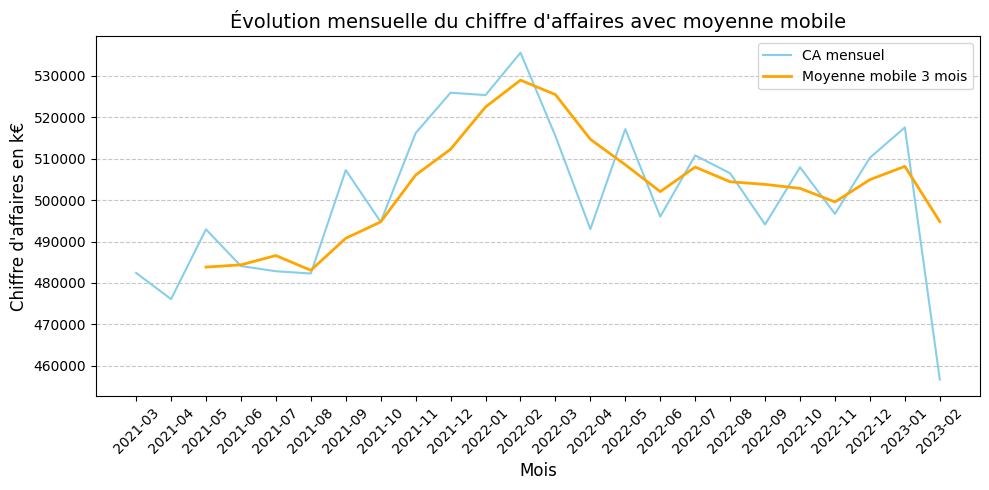

In [ ]:
# Graphique

plt.figure(figsize=(10, 5))

# Ligne du CA mensuel
plt.plot(ca_mensuel_mm["Periode"], ca_mensuel_mm["CA"], label="CA mensuel", color='skyblue')

# Ligne de la moyenne mobile
plt.plot(ca_mensuel_mm["Periode"], ca_mensuel_mm["CA lissé (3 mois)"], label="Moyenne mobile 3 mois", color='orange', linewidth=2)

plt.title("Évolution mensuelle du chiffre d'affaires avec moyenne mobile", fontsize=14)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Chiffre d'affaires en k€", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Croissance moyenne mensuelle du CA

df_final['mois'] = pd.to_datetime(df_final['date_transaction']).dt.to_period('M')

ca_mensuel = df_final.groupby('mois')['prix'].sum().sort_index()

croissance_mensuelle_moyenne = ca_mensuel.pct_change().mean() * 100
print(f"Croissance mensuelle moyenne du CA : {croissance_mensuelle_moyenne:.2f} %")

Croissance mensuelle moyenne du CA : -0.17 %


In [ ]:
# CA par catégorie

# Regroupement par catégorie
ca_par_categorie = df_final.groupby("categorie")["prix"].sum().reset_index()

# Arrondi à l'euro
ca_par_categorie["CA"] = ca_par_categorie["prix"].round(0).astype(int)

# Suppression de l'ancienne colonne 'prix'
ca_par_categorie = ca_par_categorie.drop(columns="prix")

# Formatage avec espaces entre les milliers
ca_par_categorie["CA"] = ca_par_categorie["CA"].apply(lambda x: f"{x:,}".replace(",", " "))

# Tri décroissant
ca_par_categorie = ca_par_categorie.sort_values(by="CA", ascending=False).reset_index(drop=True)

# Réorganisation des colonnes : CA à gauche
ca_par_categorie = ca_par_categorie[["CA", "categorie"]]

ca_par_categorie


,CA,categorie
0,4 827 657,1
1,4 419 731,0
2,2 780 275,2


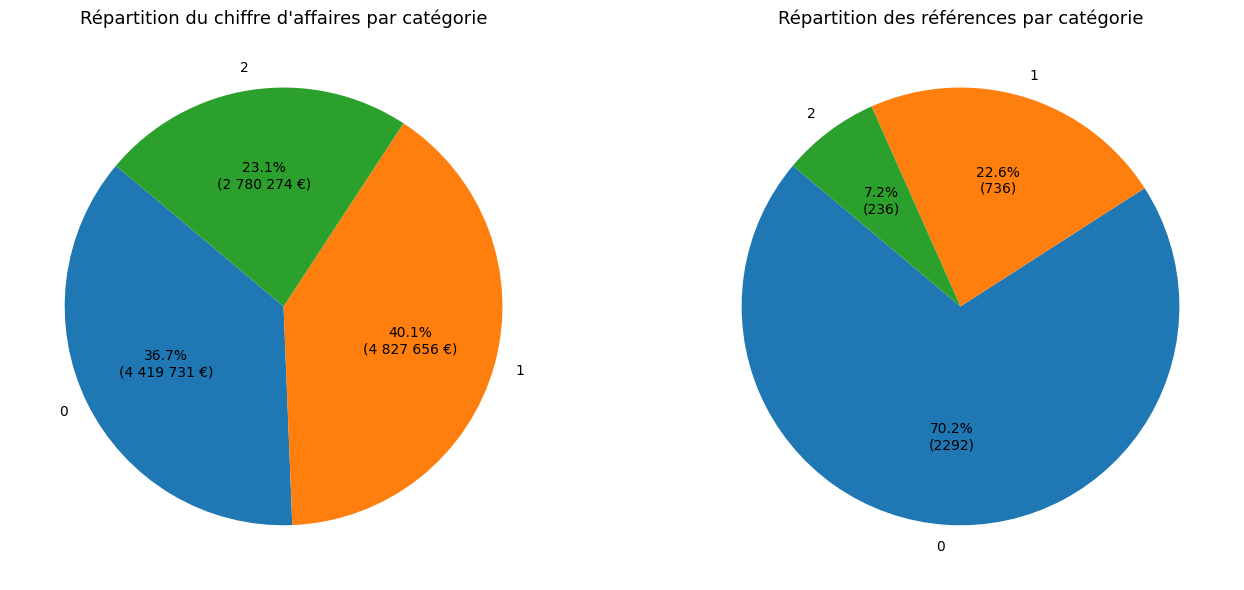

In [ ]:
# Répartition du CA par catégorie / Références par catégorie

# Définition des couleurs fixes pour chaque catégorie
couleurs = {
    0: "#1f77b4",  # bleu
    1: "#ff7f0e",  # orange
    2: "#2ca02c",  # vert
}

# --- CA par catégorie ---
ca_par_categorie = df_final.groupby("categorie")["prix"].sum().reset_index()
ca_par_categorie["CA"] = ca_par_categorie["prix"].round(0).astype(int)
ca_par_categorie = ca_par_categorie.drop(columns="prix")
ca_par_categorie = ca_par_categorie.sort_values(by="categorie").reset_index(drop=True)

# --- Références par catégorie ---
refs_par_categorie = df_final.groupby("categorie")["id_produit"].nunique().reset_index()
refs_par_categorie.rename(columns={"id_produit": "Nombre de références"}, inplace=True)
refs_par_categorie = refs_par_categorie.sort_values(by="categorie").reset_index(drop=True)

# --- Camemberts côte à côte avec couleurs cohérentes ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Camembert CA
axes[0].pie(
    ca_par_categorie["CA"],
    labels=ca_par_categorie["categorie"],
    colors=[couleurs[cat] for cat in ca_par_categorie["categorie"]],
    autopct=lambda p: f'{p:.1f}%\n({int(p/100*ca_par_categorie["CA"].sum()):,} €)'.replace(",", " "),
    startangle=140
)
axes[0].set_title("Répartition du chiffre d'affaires par catégorie", fontsize=13)

# Camembert références
axes[1].pie(
    refs_par_categorie["Nombre de références"],
    labels=refs_par_categorie["categorie"],
    colors=[couleurs[cat] for cat in refs_par_categorie["categorie"]],
    autopct=lambda p: f'{p:.1f}%\n({int(p/100*refs_par_categorie["Nombre de références"].sum())})',
    startangle=140
)
axes[1].set_title("Répartition des références par catégorie", fontsize=13)

plt.tight_layout()
plt.show()

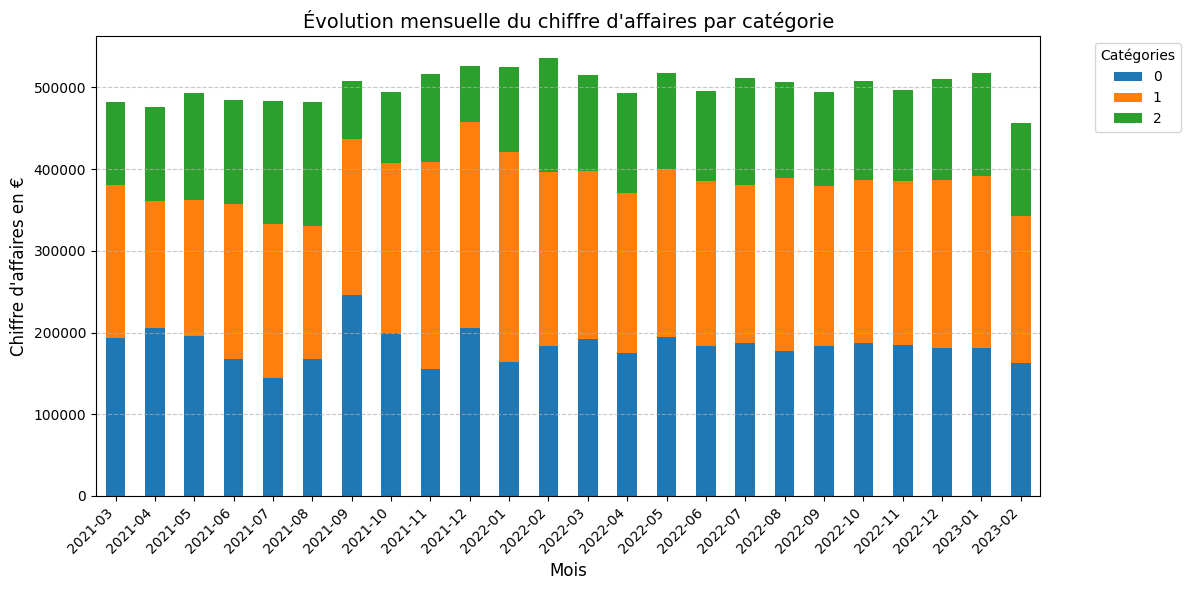

In [ ]:
# Evolution mensuelle du chiffre d'affaires par catégorie

# 1. On crée une copie pour ne pas modifier df_final
df_ca_cat = df_final.copy()

# 2. Création de la colonne 'Periode' au format AAAA-MM
df_ca_cat["Periode"] = df_ca_cat["date_transaction"].dt.to_period("M").astype(str)

# 3. Agrégation du CA par période et catégorie
df_ca_cat = df_ca_cat.groupby(["Periode", "categorie"])["prix"].sum().reset_index()

# 4. Pivot du tableau pour faciliter le plot en barres empilées
df_pivot = df_ca_cat.pivot(index="Periode", columns="categorie", values="prix").fillna(0)

# 5. Création de la liste des couleurs dans l'ordre des colonnes
liste_couleurs = [couleurs[cat] for cat in df_pivot.columns]

# 6. Création du graphique en barres empilées avec couleurs fixes
ax = df_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=liste_couleurs
)

# Mise en forme
plt.title("Évolution mensuelle du chiffre d'affaires par catégorie", fontsize=14)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Chiffre d'affaires en €", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Catégories", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



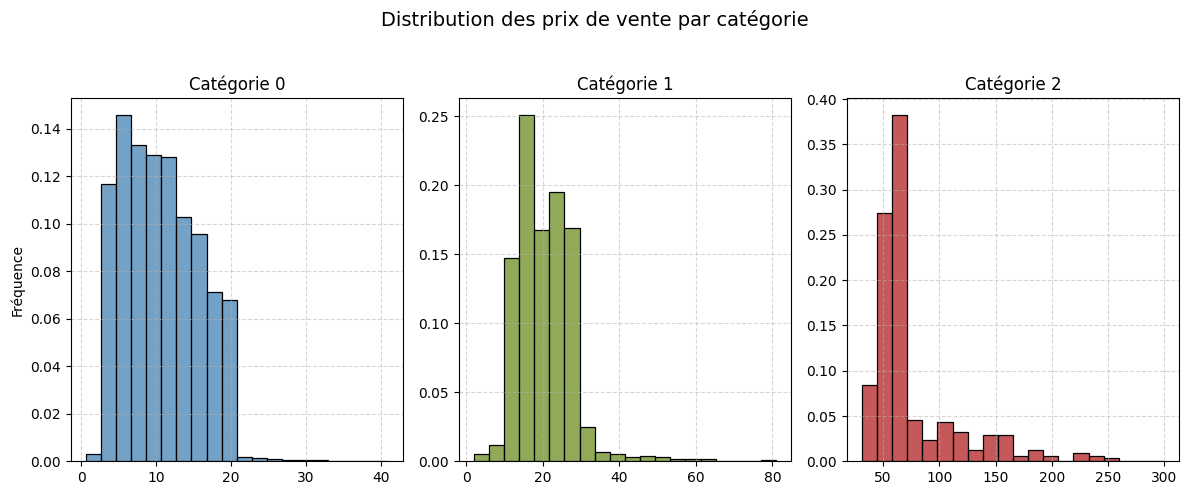

In [ ]:
# Création de la figure
plt.figure(figsize=(12, 5))

# Récupération des catégories uniques
categories = sorted(df_final["categorie"].unique())

# Couleurs personnalisées (facultatif)
couleurs = ['steelblue', 'olivedrab', 'firebrick']

# Boucle sur chaque catégorie pour tracer son histogramme
for i, cat in enumerate(categories):
    plt.subplot(1, len(categories), i+1)
    subset = df_final[df_final["categorie"] == cat]

    sns.histplot(subset["prix"], bins=20, kde=False, stat="probability", color=couleurs[i])

    plt.title(f"Catégorie {cat}")
    plt.xlabel("")
    plt.ylabel("Fréquence" if i == 0 else "")
    plt.grid(True, linestyle='--', alpha=0.5)

# Titre global
plt.suptitle("Distribution des prix de vente par catégorie", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# Nombre de clients distincts

# Nombre total de clients distincts
nb_clients_distincts = df_final["client_id"].nunique()
print(f"Nombre total de clients distincts : {nb_clients_distincts}")

Nombre total de clients distincts : 8600


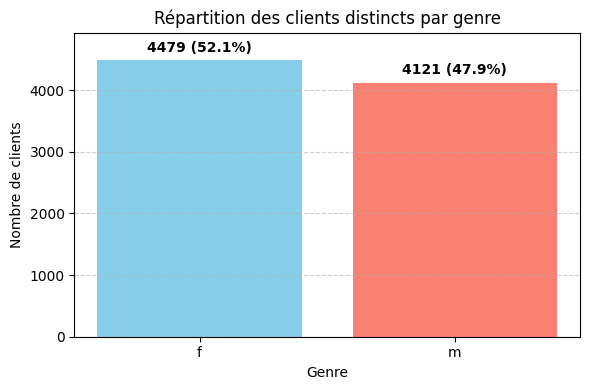

In [ ]:
# Répartition des clients par genre

# Sélection des colonnes utiles et suppression des doublons par client
clients_uniques = df_final[["client_id", "genre"]].drop_duplicates()

# Comptage des clients par genre
repartition_genre = clients_uniques["genre"].value_counts().sort_index()
total_clients = repartition_genre.sum()
pourcentages = (repartition_genre / total_clients * 100).round(1)

# Création du graphique

# Couleurs associées à chaque genre
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6, 4))
bars = plt.bar(repartition_genre.index, repartition_genre.values, color=colors)

# Ajout du texte (avec léger décalage horizontal)
for i, (count, pct) in enumerate(zip(repartition_genre.values, pourcentages.values)):
    plt.text(i, count + total_clients * 0.01, f"{count} ({pct}%)",
             ha='center', va='bottom', fontsize=10, fontweight='bold',
             rotation=0, clip_on=False)

plt.title("Répartition des clients distincts par genre")
plt.xlabel("Genre")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=0)
plt.ylim(0, max(repartition_genre.values) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

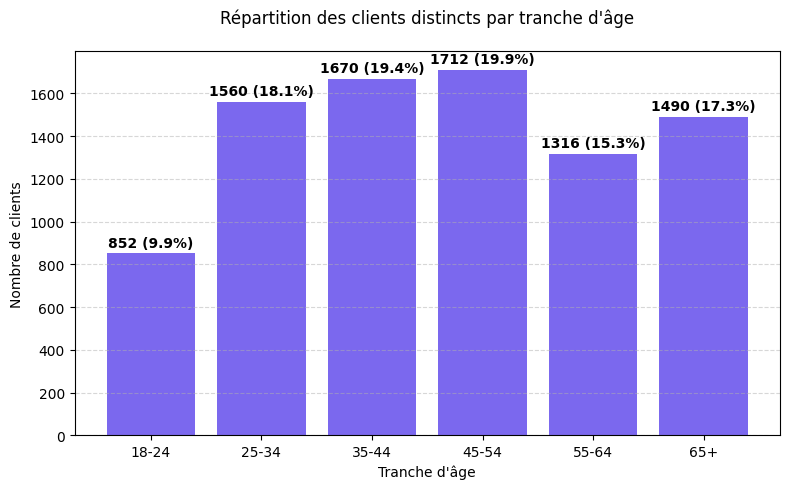

In [ ]:
# Répartition des clients par tranche d'âge

# Étape 1 : Extraire les clients uniques avec leur année de naissance
clients_uniques = df_final[["client_id", "annee_naissance"]].drop_duplicates()

# Étape 2 : Calcul de l’âge en 2023 (à adapter si besoin)
clients_uniques["age"] = 2025 - clients_uniques["annee_naissance"]

# Étape 3 : Définir les tranches d'âge
bins = [17, 24, 34, 44, 54, 64, 120]  # 18–24, 25–34, ..., 65+
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
clients_uniques["tranche_age"] = pd.cut(clients_uniques["age"], bins=bins, labels=labels)

# Étape 4 : Comptage par tranche
repartition_age = clients_uniques["tranche_age"].value_counts().sort_index()
total = repartition_age.sum()
pourcentages = (repartition_age / total * 100).round(1)

# Affichage du graphique
plt.figure(figsize=(8, 5))
bars = plt.bar(repartition_age.index, repartition_age.values, color='mediumslateblue')

# Ajout des valeurs au-dessus des barres
for i, (count, pct) in enumerate(zip(repartition_age.values, pourcentages.values)):
    plt.text(i, count + total * 0.002, f"{count} ({pct}%)",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titre avec un pad pour l’éloigner du haut
plt.title("Répartition des clients distincts par tranche d'âge", pad=20)
plt.xlabel("Tranche d'âge")
plt.ylabel("Nombre de clients")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

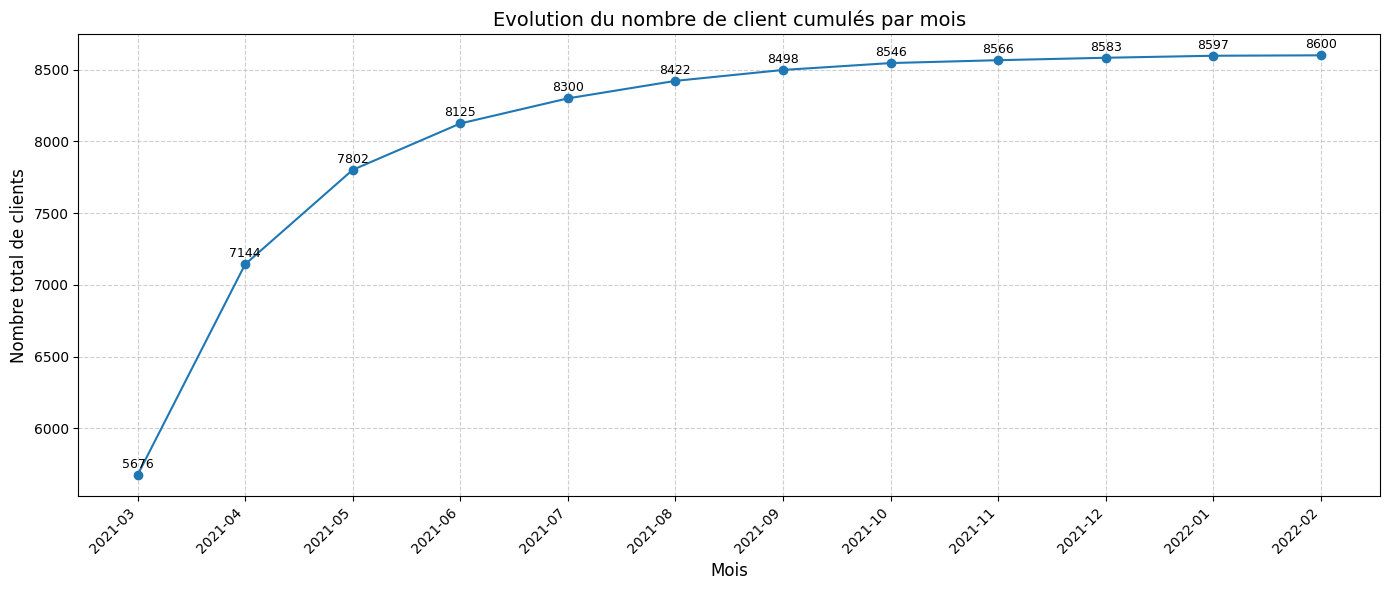

In [ ]:
# Evolution du nombre de clients cumulés par mois

# 1. Identifier la date de première transaction de chaque client
df_first_months = df_final.groupby("client_id")["date_transaction"].min().reset_index()
df_first_months["Periode"] = df_first_months["date_transaction"].dt.to_period("M").astype(str)

# Compter le nombre de nouveaux clients par mois
nouveaux_clients = df_first_months.groupby("Periode")["client_id"].count().reset_index()
nouveaux_clients.rename(columns={"client_id": "Nouveaux clients"}, inplace=True)

# Calculer le cumul de clients
nouveaux_clients["Nombre cumulé de clients"] = nouveaux_clients["Nouveaux clients"].cumsum()

# Affichage du graphique
plt.figure(figsize=(14, 6))
plt.plot(nouveaux_clients["Periode"], nouveaux_clients["Nombre cumulé de clients"], marker='o', linestyle='-')

# Afficher les valeurs au-dessus des points
for i, value in enumerate(nouveaux_clients["Nombre cumulé de clients"]):
    plt.text(i, value + 50, str(value), ha='center', fontsize=9)

plt.title("Evolution du nombre de client cumulés par mois", fontsize=14)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Nombre total de clients", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Vérification de la plage de données

# S'assurer que la colonne 'Periode' existe
df_final["Periode"] = df_final["date_transaction"].dt.to_period("M").astype(str)

# Identifier le premier mois d'achat pour chaque client
df_first_months = df_final.groupby("client_id")["Periode"].min().reset_index()

# Vérifier le mois le plus récent d’un premier achat client
dernier_mois_nouveau_client = df_first_months["Periode"].max()
print(f"Dernier mois d’apparition d’un nouveau client : {dernier_mois_nouveau_client}")

Dernier mois d’apparition d’un nouveau client : 2022-02


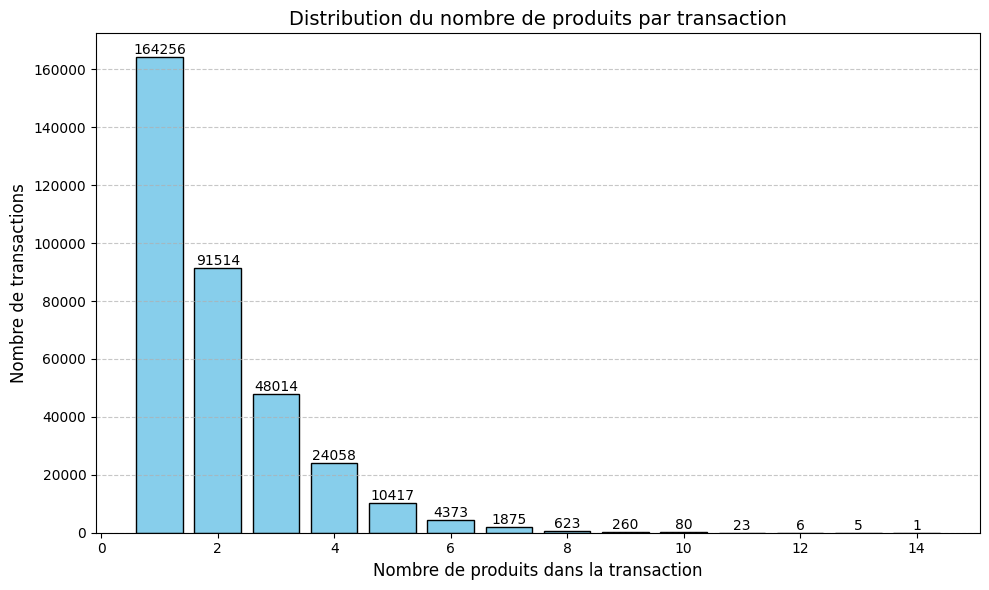

In [ ]:
# Distribution du nombre de produits par transaction

# 1. Calcul du nombre de produits par transaction
produits_par_transaction = df_final.groupby("session_id")["id_produit"].count().reset_index()
produits_par_transaction.rename(columns={"id_produit": "Nombre de produits"}, inplace=True)

# 2. Calcul de la distribution (fréquence de chaque nombre de produits)
distribution = produits_par_transaction["Nombre de produits"].value_counts().sort_index()

# 3. Visualisation en histogramme
plt.figure(figsize=(10, 6))
bars = plt.bar(distribution.index, distribution.values, color='skyblue', edgecolor='black')

# Ajout des valeurs au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha='center', va='bottom')

plt.title("Distribution du nombre de produits par transaction", fontsize=14)
plt.xlabel("Nombre de produits dans la transaction", fontsize=12)
plt.ylabel("Nombre de transactions", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Nombre total de transactions

nb_transactions = df_final['session_id'].nunique()
print(f"Nombre total de transactions : {nb_transactions:,}".replace(",", " "))

Nombre total de transactions : 345 505


In [ ]:
# Panier moyen
panier_moyen = df_final['prix'].sum() / df_final['session_id'].nunique()
print(f"Panier moyen : {panier_moyen:.2f} €")

Panier moyen : 34.81 €


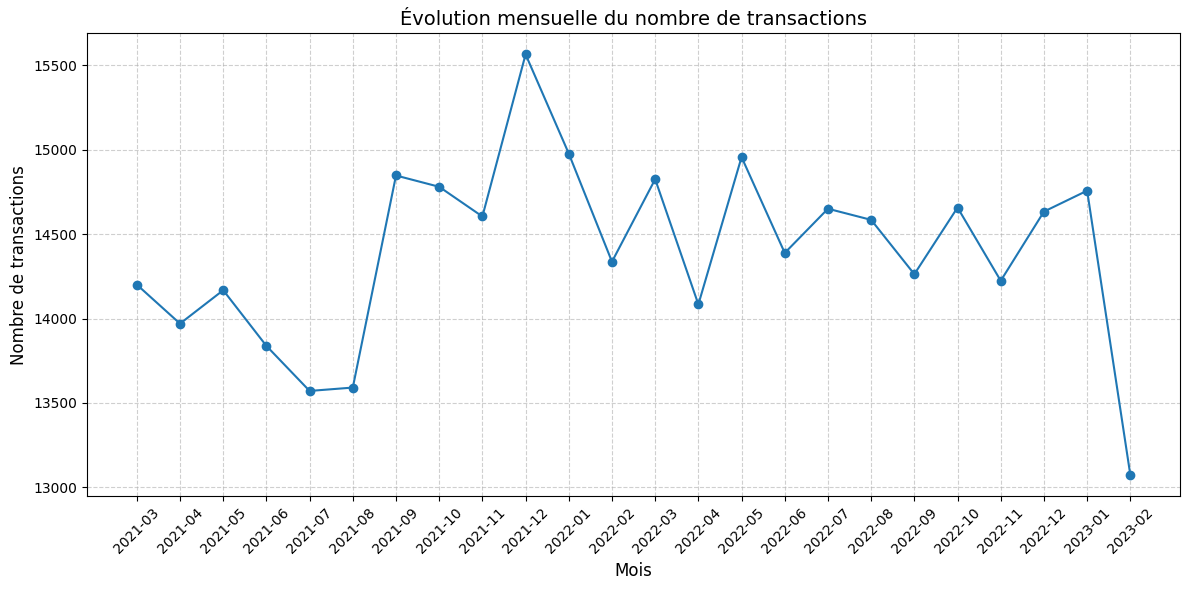

In [ ]:
# Evolution mensuelle du nombre de transactions

# 1. Calcul du nombre de transactions par mois
transactions_mensuelles = df_final.groupby("Periode")["session_id"].nunique().reset_index()
transactions_mensuelles.rename(columns={"session_id": "Nombre de transactions"}, inplace=True)

# 2. Visualisation
plt.figure(figsize=(12, 6))
plt.plot(transactions_mensuelles["Periode"], transactions_mensuelles["Nombre de transactions"], marker='o', linestyle='-')

plt.title("Évolution mensuelle du nombre de transactions", fontsize=14)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Nombre de transactions", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


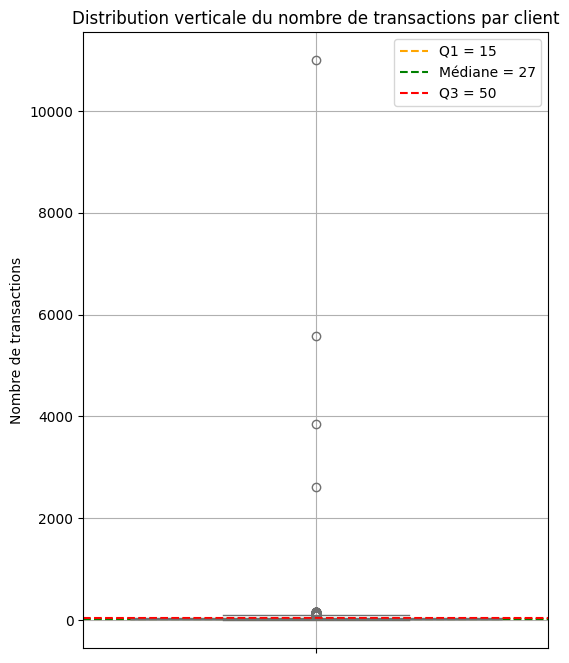

Min : 1
Q1 : 15.0
Médiane : 27.0
Q3 : 50.0
Max : 10997
Nombre d'outliers (au-dessus de Q3 + 1.5*IQR) : 457
Exemples d'outliers :
client_id
c_1609    10997
c_3454     5571
c_4958     3851
c_6714     2620
c_8526      167
Name: session_id, dtype: int64


In [ ]:
# Nombre de transactions par client

import seaborn as sns

# Calcul du nombre de transactions par client
transactions_par_client = df_final.groupby('client_id')['session_id'].nunique()


# Calcul des statistiques
desc = transactions_par_client.describe()
q1 = transactions_par_client.quantile(0.25)
q2 = transactions_par_client.median()
q3 = transactions_par_client.quantile(0.75)
iqr = q3 - q1
min_val = transactions_par_client.min()
max_val = transactions_par_client.max()
outliers = transactions_par_client[transactions_par_client > q3 + 1.5 * iqr]

# Affichage du boxplot vertical
plt.figure(figsize=(6, 8))
sns.boxplot(y=transactions_par_client, color='skyblue')
plt.title("Distribution verticale du nombre de transactions par client")
plt.ylabel("Nombre de transactions")

# Annoter les statistiques sur le plot
plt.axhline(q1, color='orange', linestyle='--', label=f"Q1 = {q1:.0f}")
plt.axhline(q2, color='green', linestyle='--', label=f"Médiane = {q2:.0f}")
plt.axhline(q3, color='red', linestyle='--', label=f"Q3 = {q3:.0f}")
plt.legend(loc='upper right')

plt.grid(True)
plt.show()

# Affichage console des statistiques
print(f"Min : {min_val}")
print(f"Q1 : {q1}")
print(f"Médiane : {q2}")
print(f"Q3 : {q3}")
print(f"Max : {max_val}")
print(f"Nombre d'outliers (au-dessus de Q3 + 1.5*IQR) : {outliers.count()}")
print("Exemples d'outliers :")
print(outliers.sort_values(ascending=False).head())

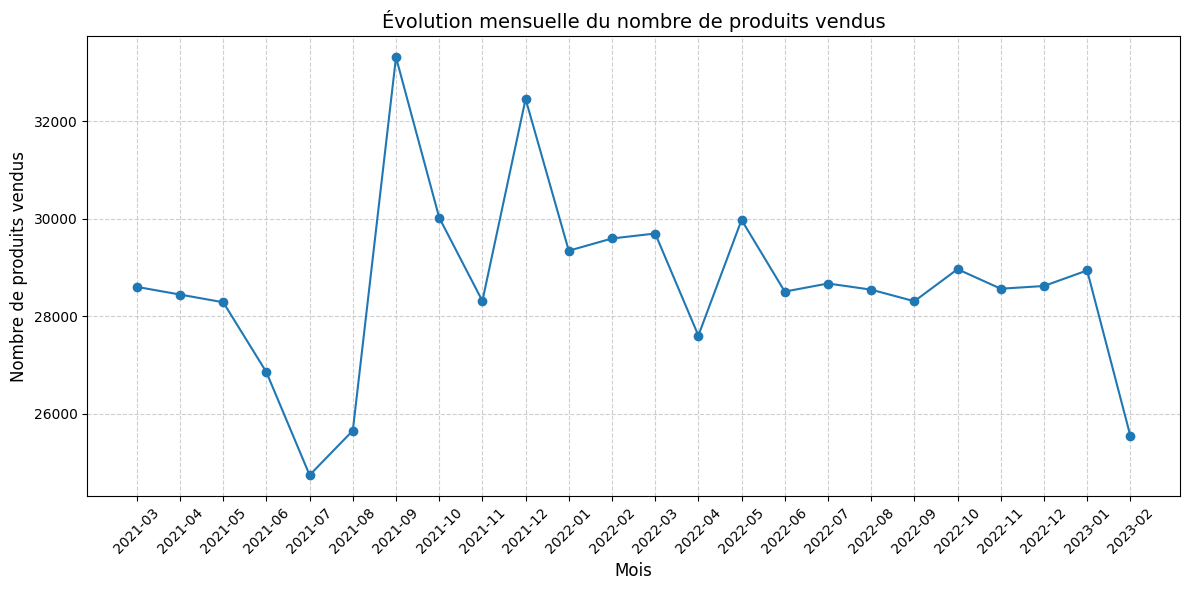

In [ ]:
# Evolution mensuelle du nombre de produits vendus

import matplotlib.pyplot as plt

# 1. Calcul du nombre de produits vendus par mois
produits_mensuel = df_final.groupby("Periode")["id_produit"].count().reset_index()
produits_mensuel.rename(columns={"id_produit": "Nombre de produits vendus"}, inplace=True)

# 2. Visualisation sans étiquettes de données
plt.figure(figsize=(12, 6))
plt.plot(produits_mensuel["Periode"], produits_mensuel["Nombre de produits vendus"], marker='o', linestyle='-')

plt.title("Évolution mensuelle du nombre de produits vendus", fontsize=14)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Nombre de produits vendus", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Focus sur les références

In [ ]:
# 1. Tous les produits référencés dans le catalogue
produits_total = set(df_products["id_produit"].unique())

# 2. Produits réellement vendus dans les transactions
produits_vendus = set(df_final["id_produit"].unique())

# 3. Produits jamais vendus
produits_non_vendus = produits_total - produits_vendus

# Résumé
print(f"Nombre total de produits dans le catalogue : {len(produits_total)}")
print(f"Nombre de produits effectivement vendus : {len(produits_vendus)}")
print(f"Nombre de produits jamais vendus : {len(produits_non_vendus)}")
print("Exemples de produits jamais vendus :", list(produits_non_vendus)[:5])


Nombre total de produits dans le catalogue : 3286
Nombre de produits effectivement vendus : 3265
Nombre de produits jamais vendus : 21
Exemples de produits jamais vendus : ['1_394', '0_1062', '0_1800', '1_0', '0_322']


Cette analyse des tops et flops concerne uniquement les produits ayant été vendus au moins une fois. Les produits jamais vendus ne sont pas pris en compte car ils n'apparaissent dans aucune transaction.

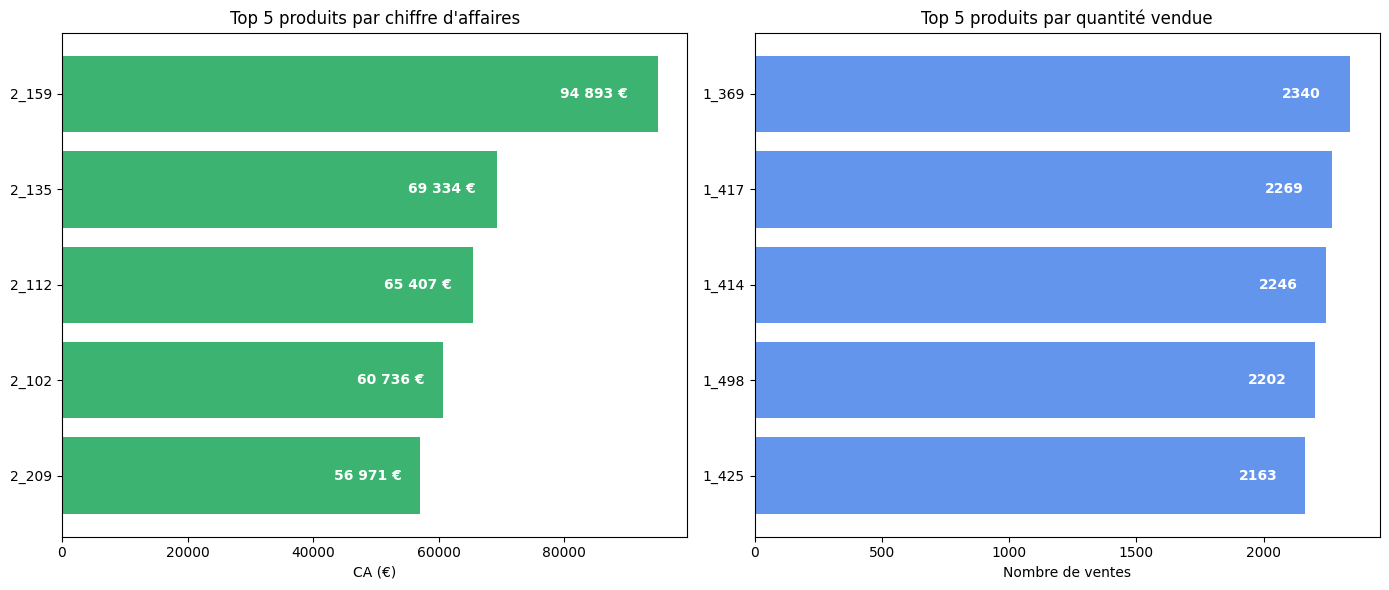

In [ ]:
# Top 5 produits en chiffre d'affaires / quantité vendue

# Top 5 produits par chiffre d'affaires
top_ca = df_final.groupby("id_produit")["prix"].sum().sort_values(ascending=False).head(5).reset_index()
top_ca.columns = ["id_produit", "CA"]

# Top 5 produits par quantité vendue
top_qte = df_final["id_produit"].value_counts().head(5).reset_index()
top_qte.columns = ["id_produit", "Quantité vendue"]

# Création des subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique 1 : Top CA
bars1 = axes[0].barh(top_ca["id_produit"], top_ca["CA"], color="mediumseagreen")
axes[0].set_title("Top 5 produits par chiffre d'affaires")
axes[0].set_xlabel("CA (€)")
axes[0].invert_yaxis()

for bar in bars1:
    width = bar.get_width()
    axes[0].text(width - (width * 0.05), bar.get_y() + bar.get_height()/2,
                 f"{int(width):,} €".replace(",", " "), ha='right', va='center',
                 color='white', fontsize=10, fontweight='bold')

# Graphique 2 : Top Quantité
bars2 = axes[1].barh(top_qte["id_produit"], top_qte["Quantité vendue"], color="cornflowerblue")
axes[1].set_title("Top 5 produits par quantité vendue")
axes[1].set_xlabel("Nombre de ventes")
axes[1].invert_yaxis()

for bar in bars2:
    width = bar.get_width()
    axes[1].text(width - (width * 0.05), bar.get_y() + bar.get_height()/2,
                 f"{width}", ha='right', va='center',
                 color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

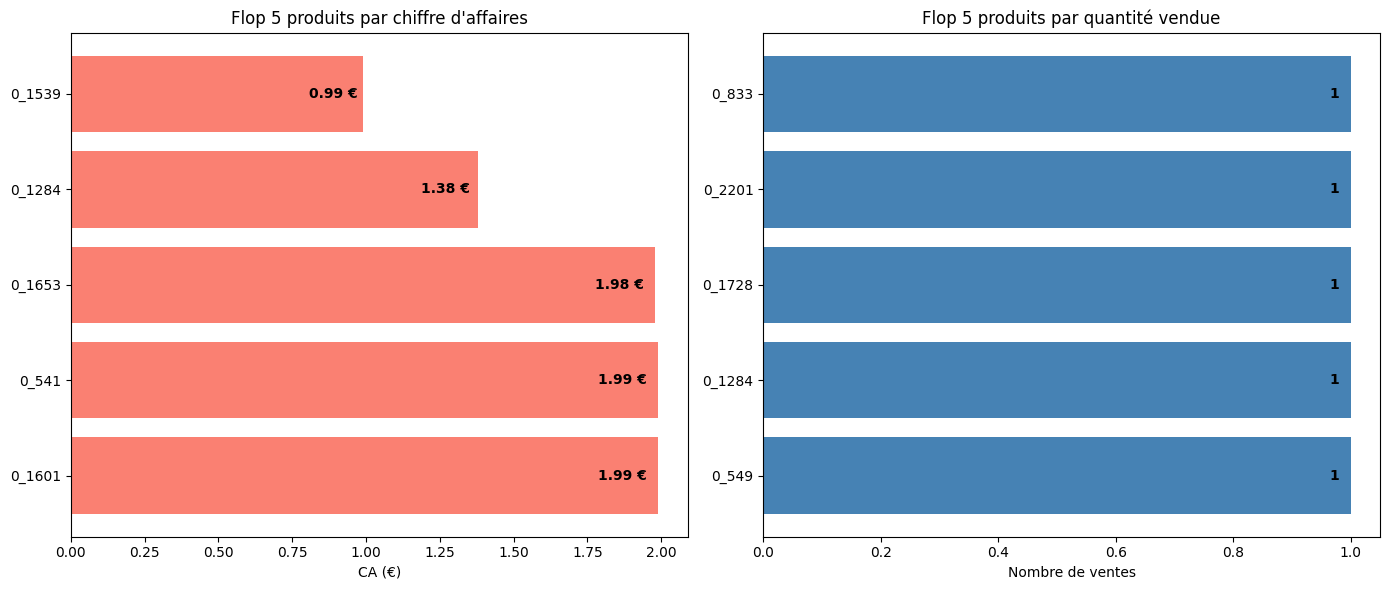

In [ ]:
# Flop 5 produits en chiffre d'affaires / quantité vendue

# Flop 5 produits par chiffre d'affaires
flop_ca = df_final.groupby("id_produit")["prix"].sum().sort_values(ascending=True).head(5).reset_index()
flop_ca.columns = ["id_produit", "CA"]

# Flop 5 produits par quantité vendue
flop_qte = df_final["id_produit"].value_counts(ascending=True).head(5).reset_index()
flop_qte.columns = ["id_produit", "Quantité vendue"]

# Création des subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graphique 1 : Flop CA
bars1 = axes[0].barh(flop_ca["id_produit"], flop_ca["CA"], color="salmon")
axes[0].set_title("Flop 5 produits par chiffre d'affaires")
axes[0].set_xlabel("CA (€)")
axes[0].invert_yaxis()

for bar in bars1:
    width = bar.get_width()
    axes[0].text(width * 0.98, bar.get_y() + bar.get_height()/2,
                 f"{width:.2f} €", ha='right', va='center',
                 color='black', fontsize=10, fontweight='bold')

# Graphique 2 : Flop Quantité
bars2 = axes[1].barh(flop_qte["id_produit"], flop_qte["Quantité vendue"], color="steelblue")
axes[1].set_title("Flop 5 produits par quantité vendue")
axes[1].set_xlabel("Nombre de ventes")
axes[1].invert_yaxis()

for bar in bars2:
    width = bar.get_width()
    axes[1].text(width * 0.98, bar.get_y() + bar.get_height()/2,
                 f"{int(width)}", ha='right', va='center',
                 color='black', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Vérifier la catégorie des produits du Top 5
print("Catégories des produits du TOP 5 par CA :")
display(df_final[df_final["id_produit"].isin(top_ca["id_produit"])][["id_produit", "categorie"]].drop_duplicates())

print("Catégories des produits du TOP 5 par Quantité :")
display(df_final[df_final["id_produit"].isin(top_qte["id_produit"])][["id_produit", "categorie"]].drop_duplicates())

# Vérifier la catégorie des produits du Flop 5
print("Catégories des produits du FLOP 5 par CA :")
display(df_final[df_final["id_produit"].isin(flop_ca["id_produit"])][["id_produit", "categorie"]].drop_duplicates())

print("Catégories des produits du FLOP 5 par Quantité :")
display(df_final[df_final["id_produit"].isin(flop_qte["id_produit"])][["id_produit", "categorie"]].drop_duplicates())

Catégories des produits du TOP 5 par CA :


,id_produit,categorie
150,2_102,2
331,2_135,2
676,2_209,2
782,2_159,2
1259,2_112,2


Catégories des produits du TOP 5 par Quantité :


,id_produit,categorie
65,1_425,1
109,1_417,1
207,1_414,1
689,1_498,1
758,1_369,1


Catégories des produits du FLOP 5 par CA :


,id_produit,categorie
6346,0_1601,0
7437,0_541,0
41359,0_1284,0
85656,0_1539,0
293680,0_1653,0


Catégories des produits du FLOP 5 par Quantité :


,id_produit,categorie
38164,0_549,0
41359,0_1284,0
46079,0_1728,0
192046,0_833,0
211595,0_2201,0


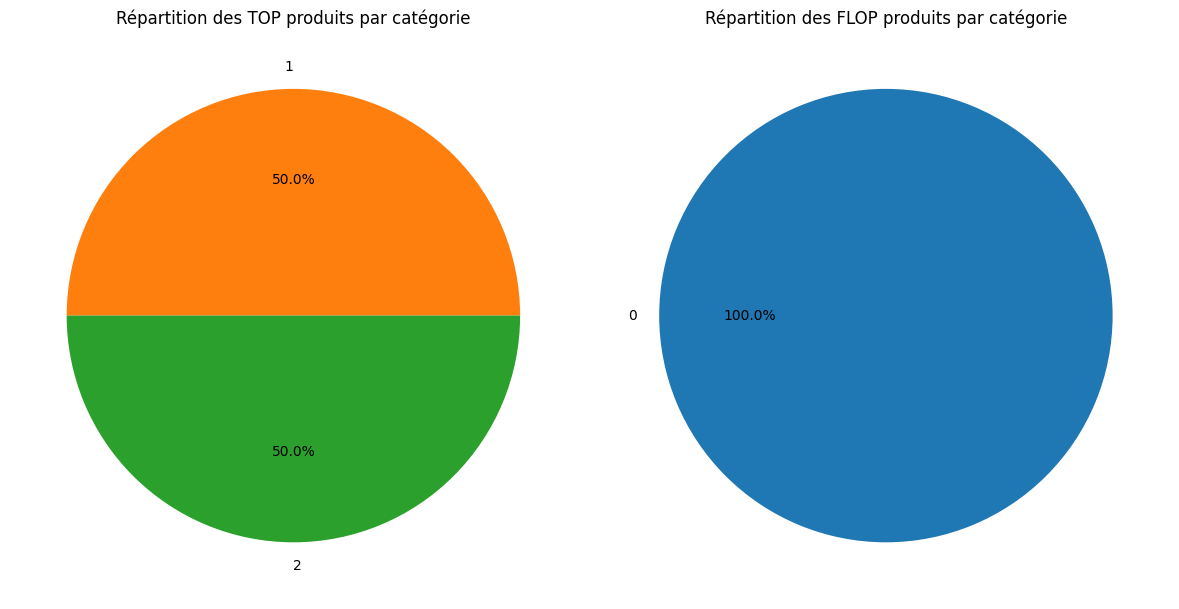

In [ ]:
# Répartition des tops et flops par catégorie

# 1. Récupérer les ID produits à partir des DataFrames existants
top_ids = list(set(top_ca["id_produit"].tolist() + top_qte["id_produit"].tolist()))
flop_ids = list(set(flop_ca["id_produit"].tolist() + flop_qte["id_produit"].tolist()))

# 2. Extraire les catégories de ces produits (en supprimant les doublons éventuels)
top_categories = df_final[df_final["id_produit"].isin(top_ids)][["id_produit", "categorie"]].drop_duplicates()
flop_categories = df_final[df_final["id_produit"].isin(flop_ids)][["id_produit", "categorie"]].drop_duplicates()

# 3. Compter les occurrences de chaque catégorie
top_cat_counts = top_categories["categorie"].value_counts()
flop_cat_counts = flop_categories["categorie"].value_counts()

# 4. Visualisation en camemberts

# Palette personnalisée
custom_colors = {
    0: "#1f77b4", # bleu
    1: "#ff7f0e", # orange
    2: "#2ca02c" # vert
}

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Couleurs alignées sur les catégories
top_colors = [custom_colors[int(cat)] for cat in top_cat_counts.index]
axes[0].pie(top_cat_counts, labels=top_cat_counts.index, autopct='%1.1f%%', colors=top_colors)
axes[0].set_title("Répartition des TOP produits par catégorie")

flop_colors = [custom_colors[int(cat)] for cat in flop_cat_counts.index]
axes[1].pie(flop_cat_counts, labels=flop_cat_counts.index, autopct='%1.1f%%', colors=flop_colors)
axes[1].set_title("Répartition des FLOP produits par catégorie")

plt.tight_layout()
plt.show()


In [ ]:
# Top 10 clients par CA / Flop 10 clients par CA

# Regrouper par client et calculer le chiffre d'affaires total par client
df_client_ca = df_final.groupby("client_id")["prix"].sum().reset_index()

# Trier les clients par montant dépensé, du plus élevé au plus faible
df_client_ca_sorted = df_client_ca.sort_values(by="prix", ascending=False).reset_index(drop=True)

# Ajouter un rang (1 = plus gros client)
df_client_ca_sorted["rang"] = df_client_ca_sorted.index + 1

# Afficher les 10 clients qui ont le plus dépensé
print("Top 10 des clients ayant le plus dépensé :")
print(df_client_ca_sorted.head(10))

# Afficher les 10 clients qui ont le moins dépensé
print("\nTop 10 des clients ayant le moins dépensé :")
print(df_client_ca_sorted.tail(10))



Top 10 des clients ayant le plus dépensé :
  client_id       prix  rang
0    c_1609  326039.89     1
1    c_4958  290227.03     2
2    c_6714  153918.60     3
3    c_3454  114110.57     4
4    c_1570    5285.82     5
5    c_3263    5276.87     6
6    c_2140    5260.18     7
7    c_2899    5214.05     8
8    c_7319    5155.77     9
9    c_7959    5135.75    10

Top 10 des clients ayant le moins dépensé :
     client_id   prix  rang
8590    c_4976  17.89  8591
8591    c_8032  17.64  8592
8592    c_5829  16.07  8593
8593    c_5919  15.98  8594
8594    c_6040  15.72  8595
8595    c_4478  13.36  8596
8596    c_4648  11.20  8597
8597    c_8114   9.98  8598
8598    c_8140   8.30  8599
8599    c_8351   6.31  8600


Les 4 premiers clients du top 10 des clients ayant le plus dépensé sont identifiés comme des clients BtoB.

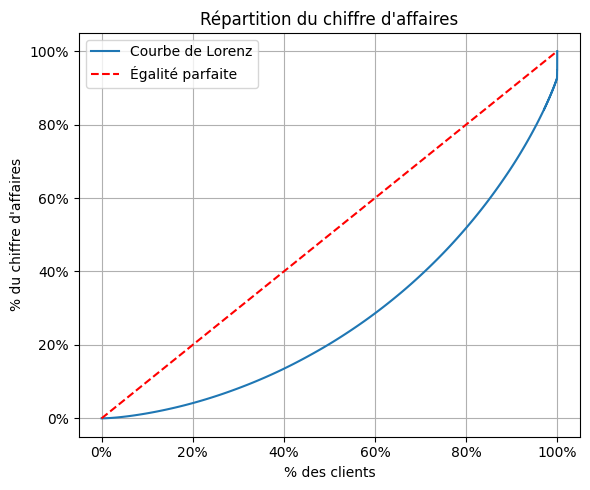

In [ ]:
# Courbe de Lorenz

import matplotlib.ticker as ticker

# Étape 1 : regrouper le CA par client
df_lorenz = df_final.groupby('client_id', as_index=False)['prix'].sum()

# Étape 2 : trier les clients par chiffre d'affaires croissant
turnover = df_lorenz['prix'].values
n = len(turnover)
sorted_turnover = np.sort(turnover)

# Étape 3 : calcul du cumul normalisé
cum_turnover = np.cumsum(sorted_turnover) / sorted_turnover.sum()
cum_turnover = np.insert(cum_turnover, 0, 0)  # pour que la courbe parte de 0

# Étape 4 : échelle des clients (pourcentage cumulé)
cum_clients = np.linspace(0, 1, len(cum_turnover))

# Étape 5 : tracé
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(cum_clients, cum_turnover, drawstyle='steps-post', label='Courbe de Lorenz')
ax.plot([0, 1], [0, 1], color='red', linestyle='--', label='Égalité parfaite')

ax.set_title("Répartition du chiffre d'affaires")
ax.set_xlabel("% des clients")
ax.set_ylabel("% du chiffre d'affaires")

ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


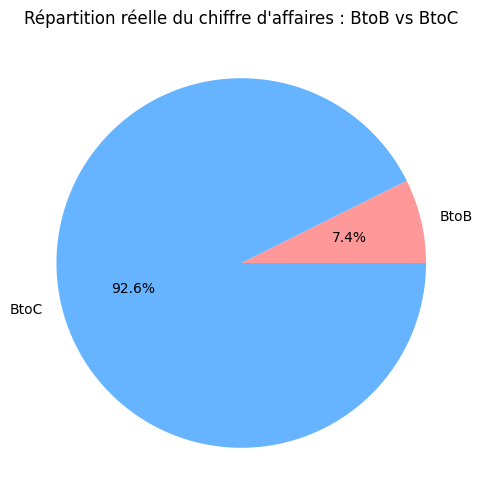

CA BtoB (4 clients) : 884,296.09 €
CA BtoC (reste des clients) : 11,143,367.01 €


In [ ]:
# Repartir les clients (4 premiers clients = BtoB)
top_10_clients = df_client_ca.sort_values(by="prix", ascending=False).reset_index(drop=True)
clients_b2b = top_10_clients.head(4)
clients_b2c = df_client_ca[~df_client_ca["client_id"].isin(clients_b2b["client_id"])]

# Calcul des chiffres d'affaires
ca_b2b = clients_b2b["prix"].sum()
ca_b2c = clients_b2c["prix"].sum()

# Graphique camembert
plt.figure(figsize=(6, 6))
plt.pie(
    [ca_b2b, ca_b2c],
    labels=["BtoB", "BtoC"],
    autopct="%1.1f%%",
    colors=["#FF9999", "#66B3FF"]
)
plt.title("Répartition réelle du chiffre d'affaires : BtoB vs BtoC")
plt.show()

# Affichage des montants
print(f"CA BtoB (4 clients) : {ca_b2b:,.2f} €")
print(f"CA BtoC (reste des clients) : {ca_b2c:,.2f} €")


## Analyse comportement clients

## Lien entre le genre d'un client et les catégories de livres achetés

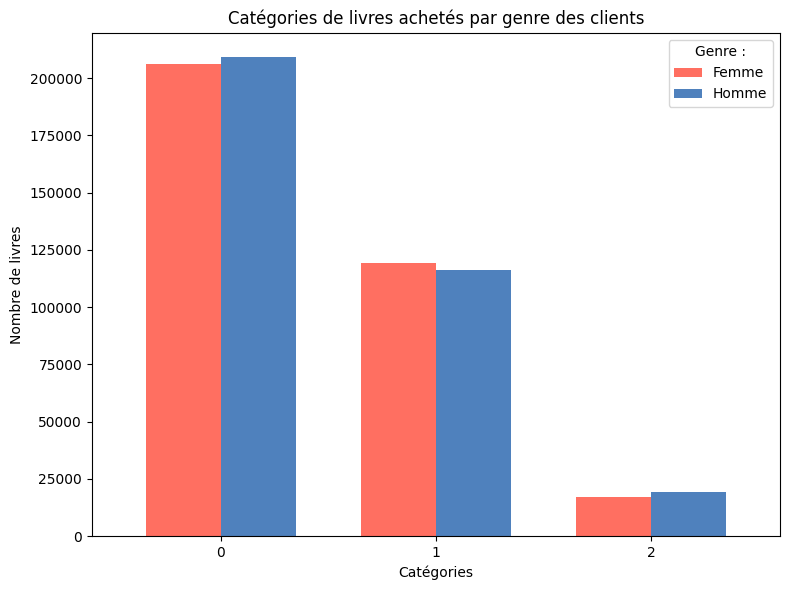

In [ ]:
# Lien entre genre d'un client et catégories des livres achetés

# Créer un tableau croisé du nombre de produits achetés par genre et par catégorie
crosstab_genre_categorie = pd.crosstab(df_final['genre'], df_final['categorie'])

# Transformer en pourcentages ligne pour faciliter la comparaison
crosstab_percent = crosstab_genre_categorie.div(crosstab_genre_categorie.sum(axis=1), axis=0) * 100

# Créer le tableau croisé brut
crosstab_genre_categorie = pd.crosstab(df_final['categorie'], df_final['genre'])

# Affichage sous forme de barres groupées avec couleurs personnalisées
ax = crosstab_genre_categorie.plot(
    kind='bar',
    figsize=(8, 6),
    width=0.7,
    color=['#FF6F61', '#4F81BD'] # f = rouge, m = bleu
)

plt.title("Catégories de livres achetés par genre des clients")
plt.xlabel("Catégories")
plt.ylabel("Nombre de livres")
plt.xticks(rotation=0)
plt.legend(title='Genre :', labels=['Femme', 'Homme'])
plt.tight_layout()
plt.show()

In [ ]:
# Création du tableau de contingence (effectifs bruts)
contingence = pd.crosstab(df_final['genre'], df_final['categorie'])

# Affichage du tableau
print("Tableau de contingence :\n")
display(contingence)

Tableau de contingence :



categorie,0,1,2
genre,,,
f,206103,119307,17283
m,209356,116285,19200


In [ ]:
from scipy.stats import chi2_contingency

# Test du Chi²
chi2_stat, p_value, dof, expected = chi2_contingency(crosstab_genre_categorie)

# Affichage des résultats
print(f"Statistique de test : {chi2_stat:.2f}")
print(f"Degrés de liberté : {dof}")
print(f"P-value : {p_value:.4f}")

# Interprétation
alpha = 0.05
if p_value < alpha:
    print("⇒ Il existe une corrélation entre le genre et la catégorie achetée (rejet H0).")
else:
    print("⇒ Aucune preuve suffisante d’un lien entre le genre et la catégorie achetée (on ne rejette pas H0).")


Statistique de test : 158.25
Degrés de liberté : 2
P-value : 0.0000
⇒ Il existe une corrélation entre le genre et la catégorie achetée (rejet H0).


Il existe une relation statistiquement significative entre le genre du client et les catégories de livres achetées (p-value < 0,001).
Cela signifie que les préférences d’achat varient selon le genre.

In [ ]:
# Résidus standarisés du test de Chi²

# Créer la table de contingence
table = pd.crosstab(df_final["genre"], df_final["categorie"])

# Effectuer le test du chi²
chi2, p, dof, expected = chi2_contingency(table)

# Calcul des résidus standardisés
residus = (table - expected) / np.sqrt(expected)

# Affichage des résidus
print("Résidus standardisés :")
print(residus.round(2))

Résidus standardisés :
categorie     0     1     2
genre                      
f         -2.15  5.48 -6.69
m          2.14 -5.47  6.66


Les femmes achètent beaucoup plus de livres de catégorie 1 et beaucoup moins de catégorie 2 (par rapport à une parfaite répartition).

Les hommes achètent beaucoup plus de livres de catégorie 2 et beaucoup moins de catégorie 1 (par rapport à une parfaite répartition).

La catégorie 0 est achetée dans des proportions proches des attentes pour les deux genres.

##Corrélation entre l'âge des clients et montant total des achats, fréquence et la taille du panier moyen​

In [ ]:
# Préparation des données

# Étape 1 : Liste des clients BtoB confirmés
clients_b2b = ['c_1609', 'c_4958', 'c_6714', 'c_3454']

# Étape 2 : Exclusion des clients BtoB
df_btoc = df_final[~df_final['client_id'].isin(clients_b2b)].copy()

# Étape 3 : Ajout de la variable 'âge'
df_btoc['age'] = 2025 - df_btoc['annee_naissance']

# Étape 4 : Calcul des indicateurs par client (CA, fréquence, panier moyen)
df_corr = (
    df_btoc.groupby(['client_id', 'age'], as_index=False)
    .agg({'prix': 'sum', 'session_id': 'nunique'})
    .rename(columns={'prix': 'turnover', 'session_id': 'frequency'})
)
df_corr['avg_basket'] = df_corr['turnover'] / df_corr['frequency']

# Affichage pour vérification
df_corr.head()

,client_id,age,turnover,frequency,avg_basket
0,c_1,70,629.02,34,18.500588
1,c_10,69,1353.60,34,39.811765
2,c_100,33,254.85,5,50.970000
3,c_1000,59,2291.88,94,24.381702
4,c_1001,43,1823.85,47,38.805319


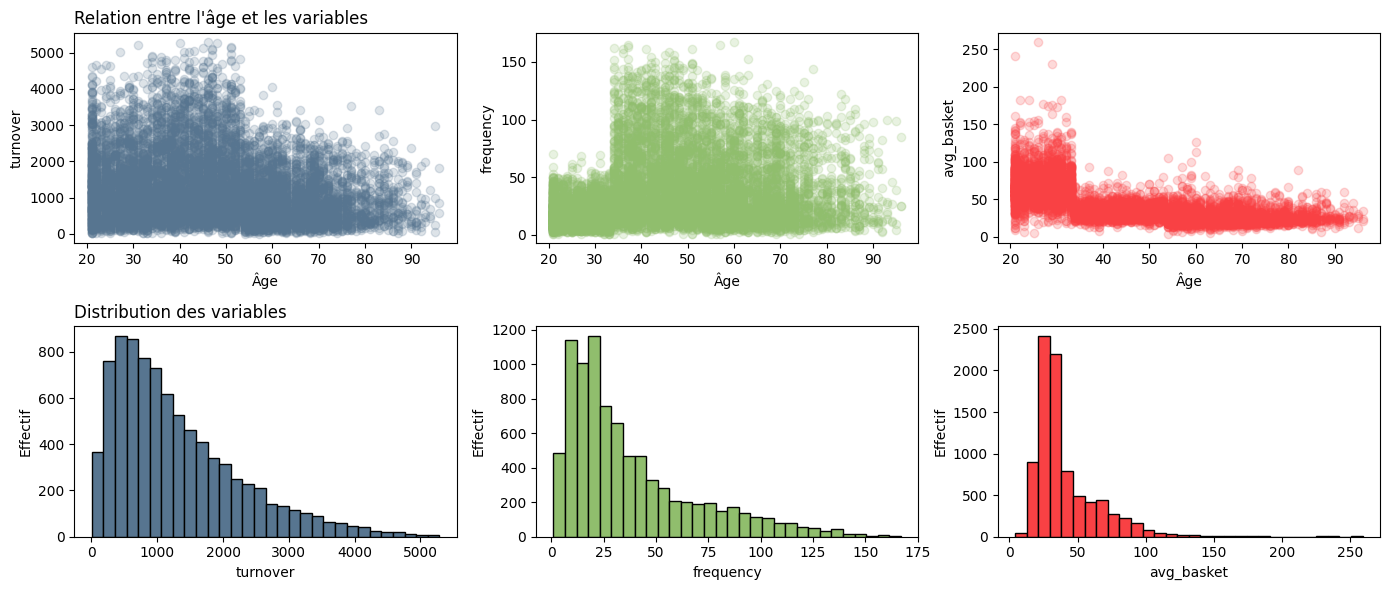

In [ ]:
# Visualisation

# Couleurs pour les 3 graphiques
colors = ['#577590', '#90be6d', '#f94144']

# Liste des variables à visualiser
variables_test = ['turnover', 'frequency', 'avg_basket']

# Création de la figure
fig, axs = plt.subplots(2, 3, figsize=(14, 6))

for j, variable in enumerate(variables_test):
    # Nuage de points : âge vs variable
    axs[0][j].scatter(df_corr['age'], df_corr[variable], alpha=0.2, color=colors[j])
    axs[0][j].set_xlabel('Âge')
    axs[0][j].set_ylabel(variable)

    # Histogramme de la variable
    axs[1][j].hist(df_corr[variable], bins=30, edgecolor='0.0', color=colors[j])
    axs[1][j].set_xlabel(variable)
    axs[1][j].set_ylabel("Effectif")

# Titres
axs[0][0].set_title("Relation entre l'âge et les variables", loc='left', fontsize=12)
axs[1][0].set_title("Distribution des variables", loc='left', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# Test de normalité

from scipy.stats import shapiro

# Test de normalité pour l'âge
stat_age, p_age = shapiro(df_corr['age'])
print(f"Shapiro - Âge : p = {p_age:.4f}")

# Test de normalité pour le chiffre d'affaires (turnover)
stat_turnover, p_turnover = shapiro(df_corr['turnover'])
print(f"Shapiro - Turnover : p = {p_turnover:.4f}")

# Test de normalité pour la fréquence d'achat (frequency)
stat_freq, p_freq = shapiro(df_corr['frequency'])
print(f"Shapiro - Frequency : p = {p_freq:.4f}")

# Test de normalité pour le panier moyen (avg_basket)
stat_basket, p_basket = shapiro(df_corr['avg_basket'])
print(f"Shapiro - Panier moyen : p = {p_basket:.4f}")



Shapiro - Âge : p = 0.0000
Shapiro - Turnover : p = 0.0000
Shapiro - Frequency : p = 0.0000
Shapiro - Panier moyen : p = 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8596.
  res = hypotest_fun_out(*samples, **kwds)


Aucune des distributions n'est normale.

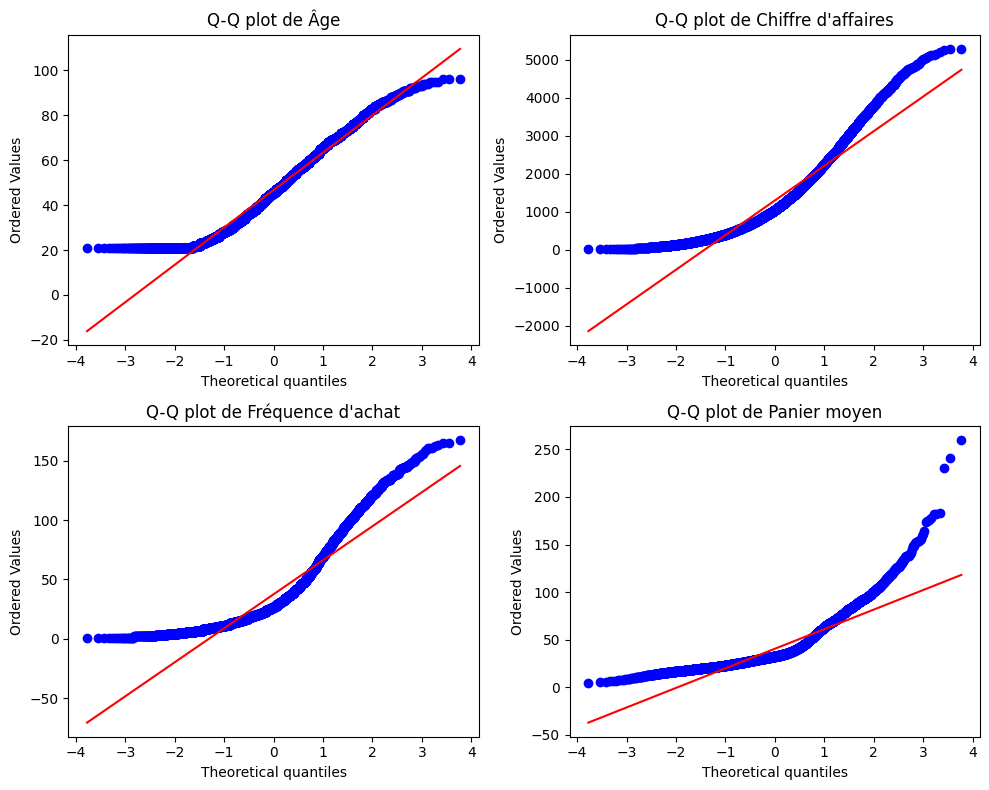

In [ ]:
# Visualisation Q-Q plots

# Liste des variables à tester
variables = ['age', 'turnover', 'frequency', 'avg_basket']
titles = ['Âge', 'Chiffre d\'affaires', 'Fréquence d\'achat', 'Panier moyen']

# Création de la figure avec 2 lignes, 2 colonnes
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, var in enumerate(variables):
    row, col = divmod(i, 2)
    stats.probplot(df_corr[var], dist="norm", plot=axs[row][col])
    axs[row][col].set_title(f"Q-Q plot de {titles[i]}")

plt.tight_layout()
plt.show()


Ces observations valident les résultats du test de Shapiro et confirment que les distributions sont non gaussiennes.

Conséquence
→ Les analyses statistiques doivent se faire avec des tests non paramétriques

In [ ]:
# Test de Spearman

from scipy.stats import spearmanr

# Liste des variables à tester
variables_test = ['turnover', 'frequency', 'avg_basket']

print("Test de Spearman entre l'âge et les variables :\n")
for var in variables_test:
    coef, p_value = spearmanr(df_corr['age'], df_corr[var])
    print(f"- Âge vs {var} :")
    print(f"  >> Coefficient de Spearman = {coef:.4f}")
    print(f"  >> p-value = {p_value:.2e}")
    if p_value > 0.05:
        print("  H0 retenue : pas de corrélation significative.\n")
    else:
        print("  H1 retenue : corrélation significative.\n")

Test de Spearman entre l'âge et les variables :

- Âge vs turnover :
  >> Coefficient de Spearman = -0.1845
  >> p-value = 1.02e-66
  H1 retenue : corrélation significative.

- Âge vs frequency :
  >> Coefficient de Spearman = 0.2120
  >> p-value = 6.63e-88
  H1 retenue : corrélation significative.

- Âge vs avg_basket :
  >> Coefficient de Spearman = -0.7006
  >> p-value = 0.00e+00
  H1 retenue : corrélation significative.



Corrélation avec le montant total des achats : Les clients plus âgés dépensent légèrement moins en cumulé que les plus jeunes.

Fréquence d'achat : Les clients plus âgés achètent un peu plus souvent.

Panier moyen : Les clients plus âgés ont un panier moyen nettement plus faible que les plus jeunes.

Ces relations sont significatives mais leur intensité varie :

-> Forte corrélation négative entre âge et panier moyen.
-> Corrélations faibles à modérées pour le montant total et la fréquence.

## Lien entre l'âge des clients et la catégorie de livres achetés

In [ ]:
# Identifier la catégorie de livres la plus achetée par chaque client
df_categorie_pref = (
    df_btoc.groupby(['client_id', 'categorie'])['prix'].sum()
    .reset_index()
    .sort_values(['client_id', 'prix'], ascending=[True, False])
    .drop_duplicates('client_id')
    .rename(columns={'categorie': 'categorie_pref'})
)

# Calcul de l'âge (si pas déjà fait)
df_ages = df_btoc[['client_id', 'annee_naissance']].drop_duplicates()
df_ages['age'] = 2023 - df_ages['annee_naissance']

# Fusion pour obtenir un DataFrame avec client_id, age, categorie_pref
df_cat_age = df_categorie_pref.merge(df_ages[['client_id', 'age']], on='client_id')

# Vérification
df_cat_age.head()

,client_id,categorie_pref,prix,age
0,c_1,0,360.15,68
1,c_10,1,809.77,67
2,c_100,2,138.53,31
3,c_1000,1,1905.03,57
4,c_1001,0,907.73,41


/tmp/ipython-input-3251666109.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cat_age, x='categorie_pref', y='age', palette='pastel')


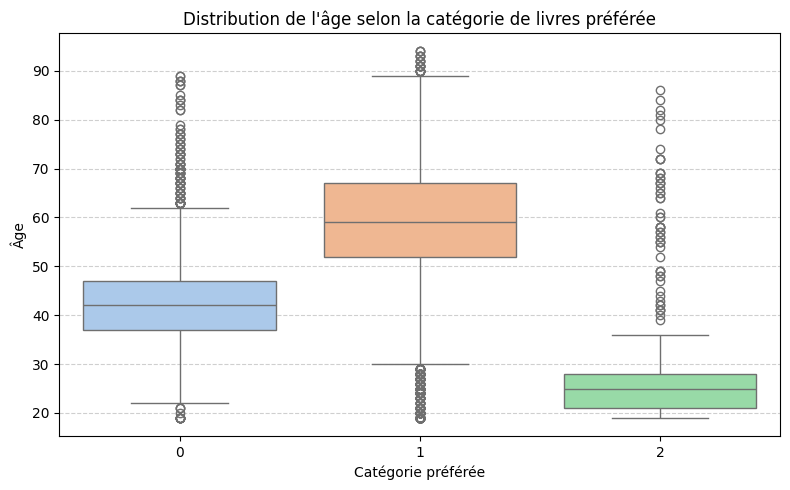

In [ ]:
# Visualisation

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cat_age, x='categorie_pref', y='age', palette='pastel')
plt.title("Distribution de l'âge selon la catégorie de livres préférée")
plt.xlabel("Catégorie préférée")
plt.ylabel("Âge")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Test de normalité

for cat in df_cat_age['categorie_pref'].unique():
    ages = df_cat_age[df_cat_age['categorie_pref'] == cat]['age']
    stat, p_value = shapiro(ages)
    print(f"Catégorie {cat} : p-value = {p_value:.4f}")

Catégorie 0 : p-value = 0.0000
Catégorie 1 : p-value = 0.0000
Catégorie 2 : p-value = 0.0000


In [ ]:
# Test de Kruskal-Wallis

from scipy.stats import kruskal

# Préparation des groupes d'âges par catégorie
groupes_age = [group['age'].values for name, group in df_cat_age.groupby('categorie_pref')]

# Test de Kruskal-Wallis
stat, p_value = kruskal(*groupes_age)
print(f"Test de Kruskal-Wallis : statistique = {stat:.4f}, p-value = {p_value:.4e}")

Test de Kruskal-Wallis : statistique = 5069.8466, p-value = 0.0000e+00


Le test de Kruskal-Wallis montre une différence statistiquement significative des âges selon les catégories de livres préférées (stat = 5069.85, p-value < 0.0001).

Cela signifie que l’âge influence la catégorie de livres achetée : les préférences varient selon les générations.

In [ ]:
# Tableau croisé

# 1. Définir les tranches d’âge
bins = [0, 30, 45, 60, 100]
labels = ['<30 ans', '30-45 ans', '45-60 ans', '60 ans et +']
df_cat_age['tranche_age'] = pd.cut(df_cat_age['age'], bins=bins, labels=labels, right=False)

# 2. Créer un tableau croisé des effectifs
table_croisee = pd.crosstab(df_cat_age['tranche_age'], df_cat_age['categorie_pref'], normalize='index') * 100

# 3. Arrondir les pourcentages
table_croisee = table_croisee.round(1)

# 4. Afficher le tableau
print("Répartition des catégories de livres préférées (%) par tranche d’âge :")
display(table_croisee)



Répartition des catégories de livres préférées (%) par tranche d’âge :


categorie_pref,0,1,2
tranche_age,,,
<30 ans,1.5,12.3,86.2
30-45 ans,74.6,13.8,11.6
45-60 ans,44.3,54.8,0.9
60 ans et +,6.2,92.3,1.5


Moins de 30 ans : très forte préférence pour la catégorie 2 (86 %).

30 à 45 ans : nette préférence pour la catégorie 0 (75 %), avec un léger intérêt pour la catégorie 1.

45 à 60 ans : préférence répartie, majorité pour la catégorie 1 (55 %), suivie de la 0.

60 ans et plus : préférence écrasante pour la catégorie 1 (92 %).

Chaque tranche d'âge a un profil de lecture distinct, ce qui confirme le lien observé dans le test de Kruskal-Wallis. Cela justifie des recommandations marketing ciblées par tranche d'âge.